In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cctvfootage/cctv.mp4
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_79.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_90.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_64.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_111.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_42.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_65.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_54.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_96.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_115.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_70.jpg
/kaggle/input/action-detectionnormalstealingpeakingsneaking/test/Peaking/Peaking_10

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.3 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found exi

In [3]:
!pip install deep_sort_realtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 58.2 MB/s eta 0:00:0000:0100:01


In [26]:
# Import all necessary libraries
from ultralytics import YOLO
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from tqdm.notebook import tqdm
from deep_sort_realtime.deepsort_tracker import DeepSort
import torch

In [44]:
print("\n========== SECTION 1: Setup and Configuration ==========")

class Config:
    DATASET_PATH = '/kaggle/input/action-detectionnormalstealingpeakingsneaking'
    TRAIN_DIR = os.path.join(DATASET_PATH, 'train')
    TEST_DIR = os.path.join(DATASET_PATH, 'test')
    CLASSES = ['Normal', 'Peaking', 'Sneaking', 'Stealing']
    CONF_THRESHOLD = 0.25
    BATCH_SIZE = 16
    IMG_SIZE = 640


model = YOLO('/kaggle/working/yolov8s.pt') 
print("Model loaded successfully!")


========== SECTION 1: Setup and Configuration ==========
Model loaded successfully!



Dataset Distribution:
Normal   - Train: 1193 images, Test:  123 images
Peaking  - Train: 1117 images, Test:  122 images
Sneaking - Train:  983 images, Test:  121 images
Stealing - Train: 1275 images, Test:  131 images

Total images in dataset: 5065


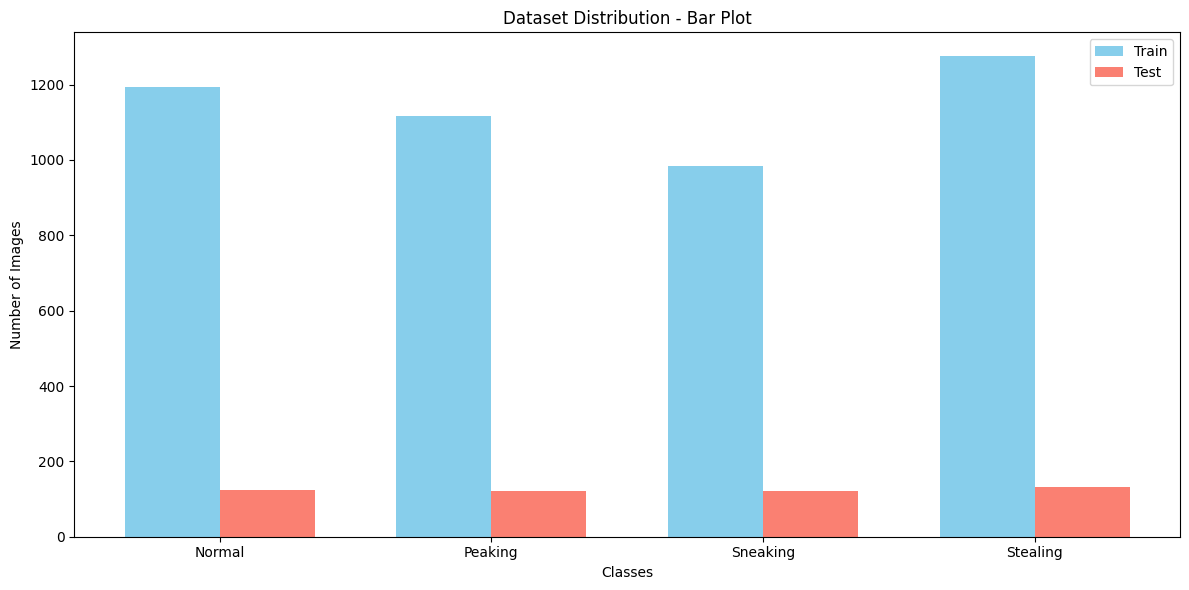

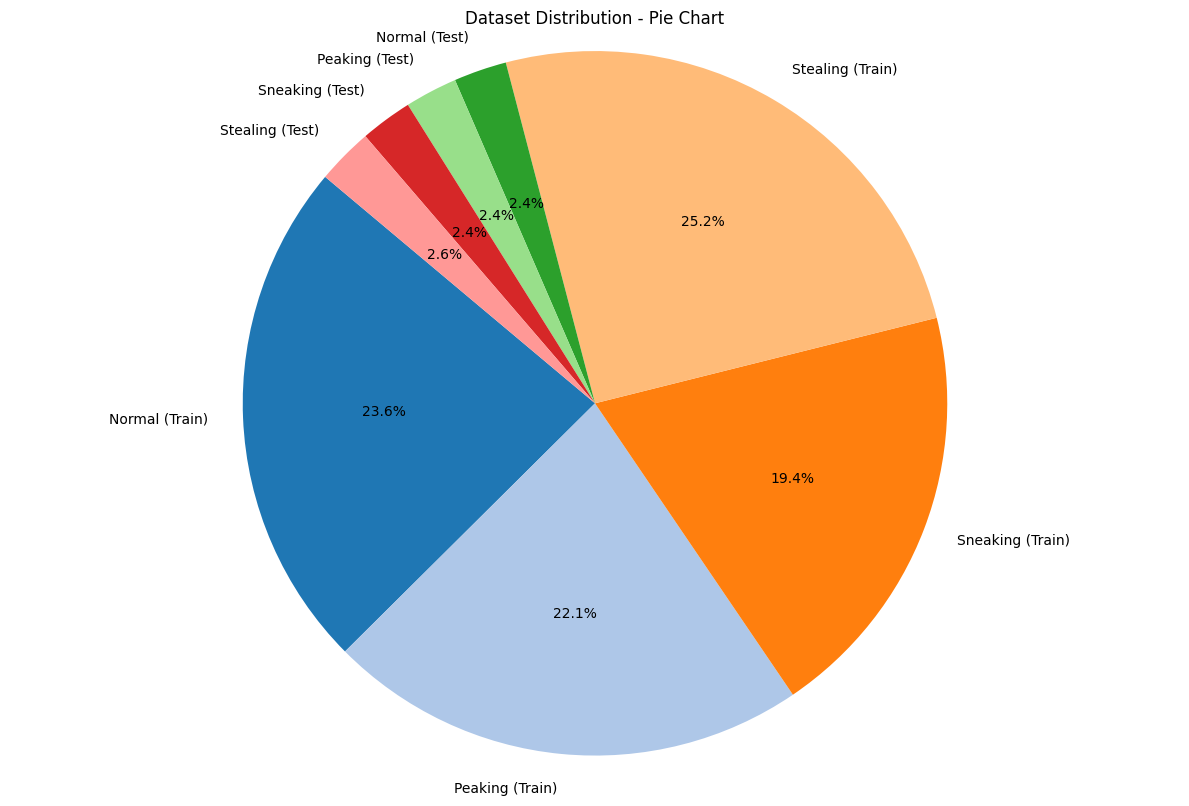

In [28]:
def explore_dataset():
    """Explore and visualize the dataset"""
    class_counts = {}
    total_train_images = 0
    total_test_images = 0
    
    print("\nDataset Distribution:")
    
    for class_name in Config.CLASSES:
        train_count = len(os.listdir(os.path.join(Config.TRAIN_DIR, class_name)))
        test_count = len(os.listdir(os.path.join(Config.TEST_DIR, class_name)))
        class_counts[class_name] = {'train': train_count, 'test': test_count}
        total_train_images += train_count
        total_test_images += test_count
        print(f"{class_name:8} - Train: {train_count:4} images, Test: {test_count:4} images")
    
    total_images = total_train_images + total_test_images
    print(f"\nTotal images in dataset: {total_images}")
    
    plt.figure(figsize=(12, 6))
    x = np.arange(len(Config.CLASSES))
    width = 0.35
    
    plt.bar(x - width/2, [counts['train'] for counts in class_counts.values()], width, label='Train', color='skyblue')
    plt.bar(x + width/2, [counts['test'] for counts in class_counts.values()], width, label='Test', color='salmon')
    
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Dataset Distribution - Bar Plot')
    plt.xticks(x, Config.CLASSES)
    plt.legend()
    plt.tight_layout()
    plt.show()

    pie_labels = [f"{class_name} (Train)" for class_name in Config.CLASSES] + \
                 [f"{class_name} (Test)" for class_name in Config.CLASSES]
    pie_sizes = [counts['train'] for counts in class_counts.values()] + \
                [counts['test'] for counts in class_counts.values()]
    pie_colors = plt.cm.tab20.colors[:len(pie_sizes)]

    plt.figure(figsize=(12, 8))
    plt.pie(pie_sizes, labels=pie_labels, autopct='%1.1f%%', startangle=140, colors=pie_colors)
    plt.title('Dataset Distribution - Pie Chart')
    plt.axis('equal')  
    plt.tight_layout()
    plt.show()

explore_dataset()


Displaying sample images...


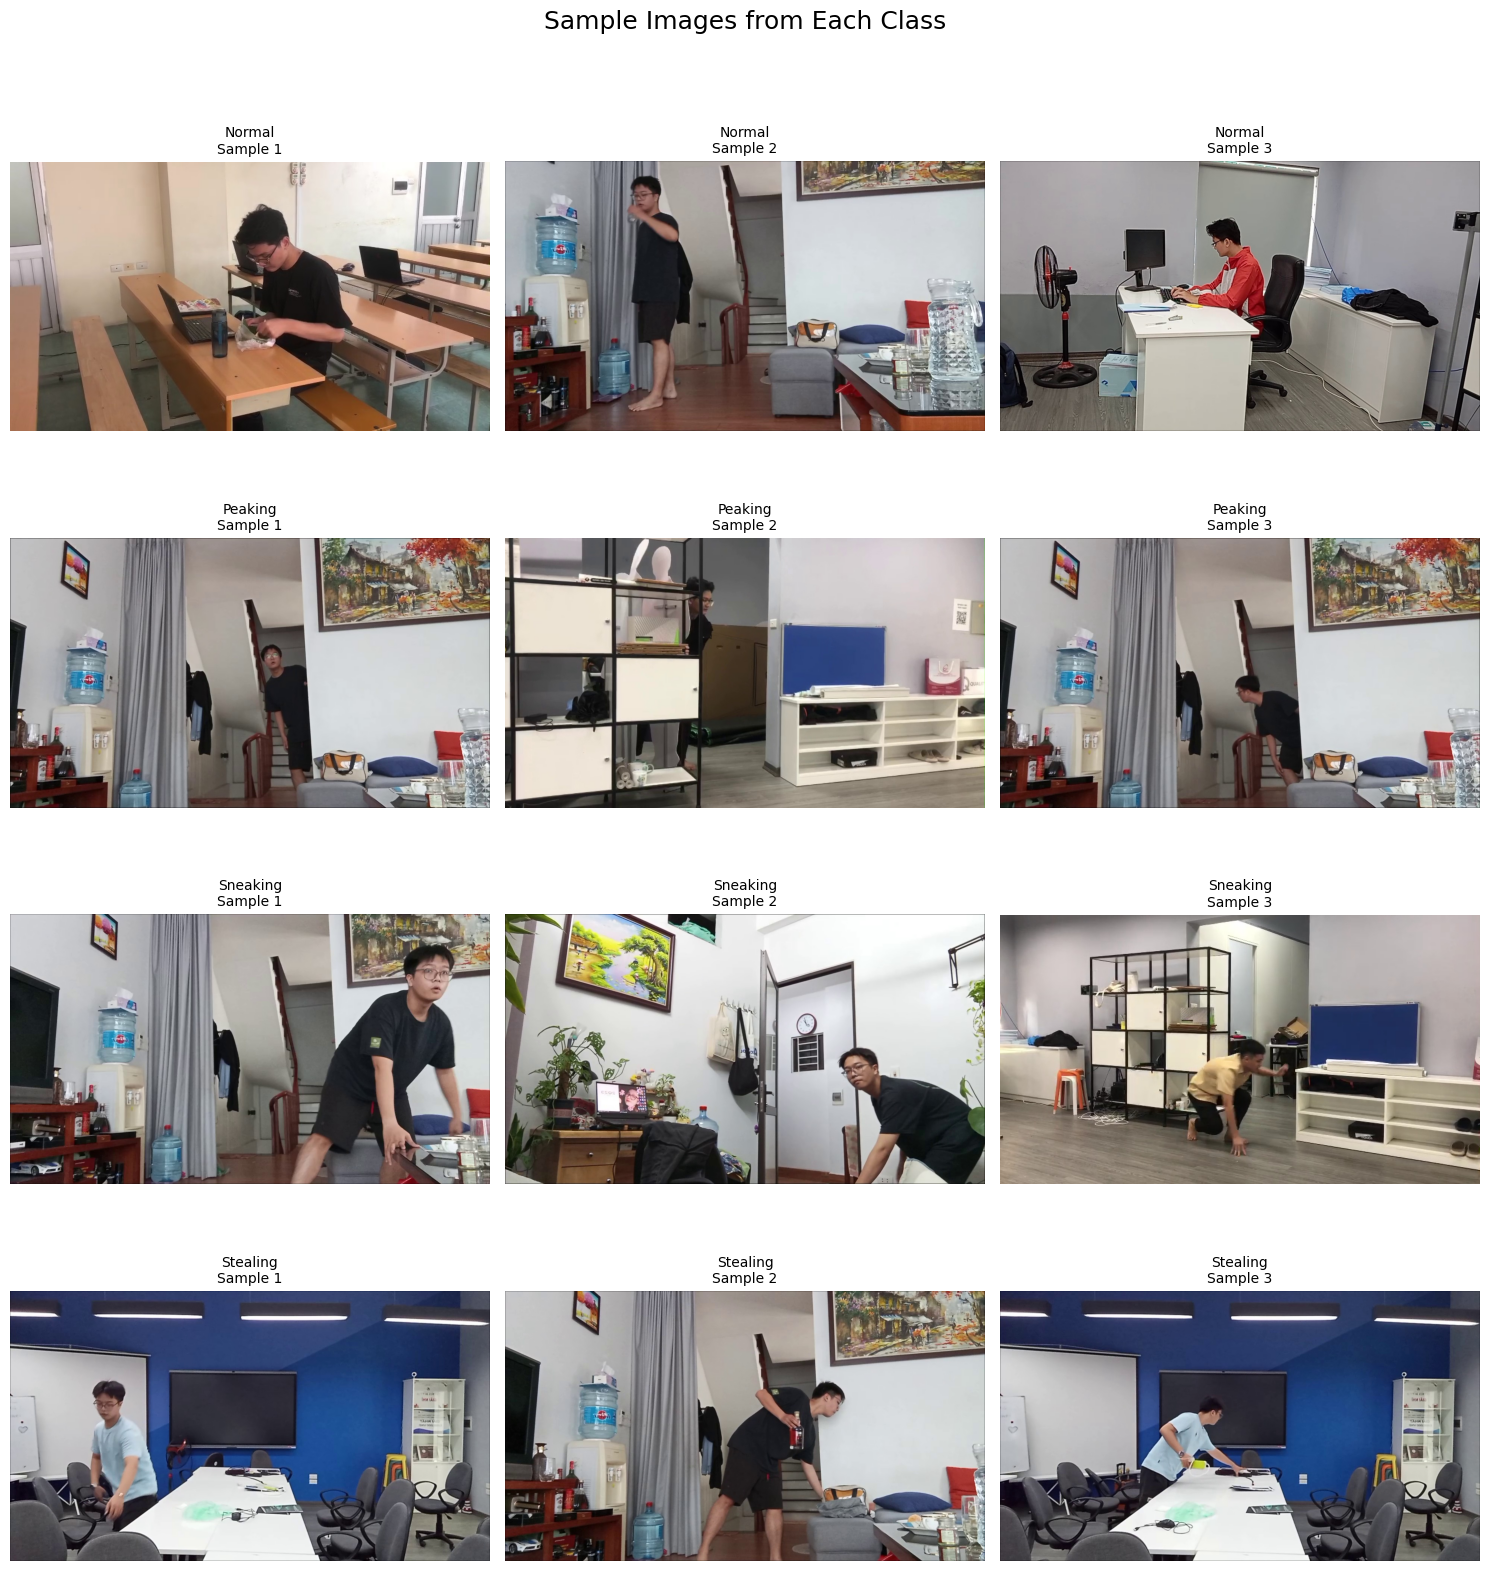

In [29]:
def show_sample_images(num_samples=3):
    """Display sample images from each class"""
    num_classes = len(Config.CLASSES)
    total_images = num_classes * num_samples
    cols = num_samples
    rows = (total_images + cols - 1) // cols  

    plt.figure(figsize=(15, rows * 4))

    for idx, class_name in enumerate(Config.CLASSES):
        class_path = os.path.join(Config.TRAIN_DIR, class_name)
        images = os.listdir(class_path)
        
        for sample_idx in range(num_samples):
            img_path = os.path.join(class_path, np.random.choice(images))
            img = Image.open(img_path)

            subplot_idx = idx * num_samples + sample_idx + 1
            plt.subplot(rows, cols, subplot_idx)
            plt.imshow(img)
            plt.title(f'{class_name}\nSample {sample_idx + 1}', fontsize=10)
            plt.axis('off')

    plt.suptitle('Sample Images from Each Class', fontsize=18, y=1.02)
    plt.tight_layout()
    plt.show()

print("\nDisplaying sample images...")
show_sample_images(num_samples=3)

In [57]:
tracker = DeepSort(max_age=30)
acc = mm.MOTAccumulator(auto_id=True)

In [68]:
base_folder = "/kaggle/input/action-detectionnormalstealingpeakingsneaking/train"
# Collect image paths from all class folders
image_paths = []
for class_name in class_names:
    class_folder = os.path.join(base_folder, class_name)
    if not os.path.exists(class_folder):
        continue
    image_files = [
        os.path.join(class_folder, f)
        for f in os.listdir(class_folder)
        if f.lower().endswith((".jpg", ".jpeg", ".png"))
    ]
    image_paths.extend(image_files)
    
# Shuffle and select 10 random images
random.shuffle(image_paths)
selected_images = image_paths[:10]

print("🖼️ Selected images:", selected_images)

🖼️ Selected images: ['/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_203.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_454.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_896.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Normal/Normal_284.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_24.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Sneaking/Sneaking_183.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_103.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Sneaking/Sneaking_627.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_481.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Normal/Normal_420.jpg']


In [69]:
print("Selected images:", selected_images)

Selected images: ['/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_203.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_454.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Peaking/Peaking_896.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Normal/Normal_284.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_24.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Sneaking/Sneaking_183.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_103.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Sneaking/Sneaking_627.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Stealing/Stealing_481.jpg', '/kaggle/input/action-detectionnormalstealingpeakingsneaking/train/Normal/Normal_420.jpg']


In [56]:
output_folder = "./trackoutputs"
os.makedirs(output_folder, exist_ok=True)

In [47]:
import matplotlib.pyplot as plt
import cv2
import os
import motmetrics as mm

In [48]:
# Define your class names corresponding to your dataset labels
class_names = ['Normal', 'Peaking', 'Sneaking', 'Stealing']

In [59]:
import random
image_files = [f for f in os.listdir(base_folder) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
random.shuffle(image_files)
selected_images = image_files[:max_display]


In [58]:

max_display = 10  # Number of random images to display
conf_threshold = 0.3


In [62]:
# Define detection and tracking function
def detect_and_track_image(frame, model, tracker, conf_threshold=0.3):
    results = model(frame)[0]
    detections = []

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, conf, cls_id = result
        if conf < conf_threshold:
            continue
        x, y, w, h = x1, y1, x2 - x1, y2 - y1
        cls_id = int(cls_id)
        cls_name = class_names[cls_id] if cls_id < len(class_names) else "Unknown"
        detections.append(([x, y, w, h], float(conf), cls_name))

    tracks = tracker.update_tracks(detections, frame=frame)
    predicted_ids = []
    predicted_boxes = []

    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x1, y1, x2, y2 = map(int, track.to_ltrb())
        predicted_ids.append(track_id)
        predicted_boxes.append([x1, y1, x2 - x1, y2 - y1])

        label = f"ID {track_id}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(
            frame,
            label,
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.6,
            (0, 255, 0),
            2,
        )

    return frame, predicted_ids, predicted_boxes


0: 384x640 1 person, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Peaking_203.jpg


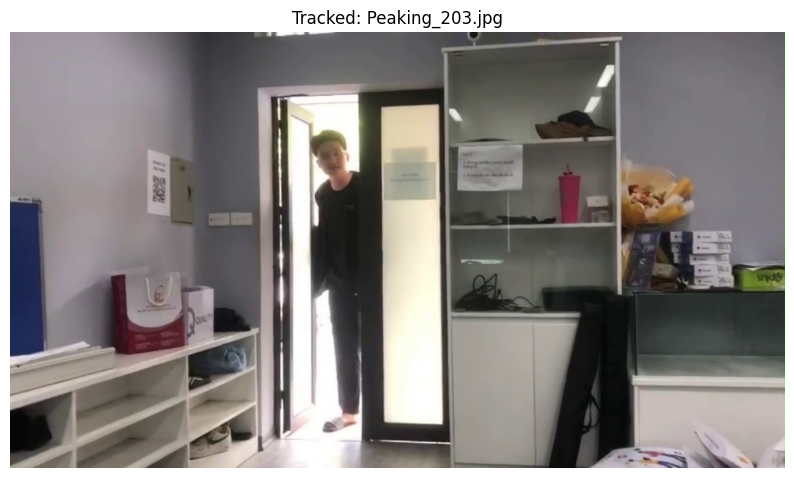


0: 384x640 1 person, 1 cup, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Peaking_454.jpg


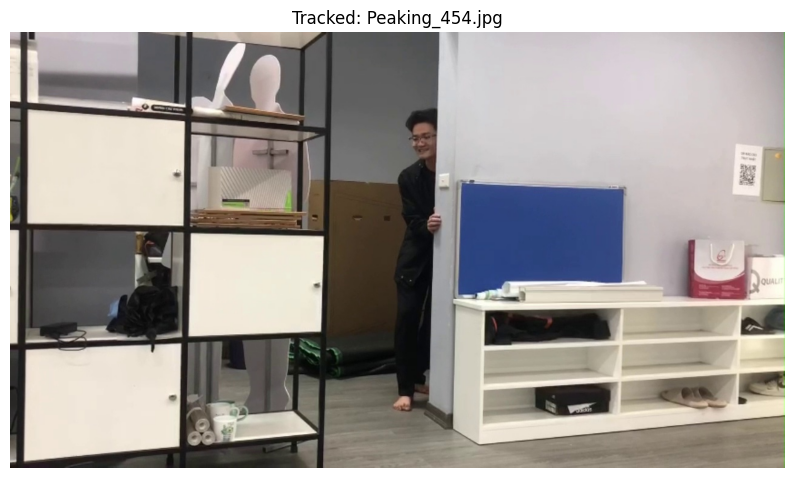


0: 384x640 6 bottles, 1 tv, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Peaking_896.jpg


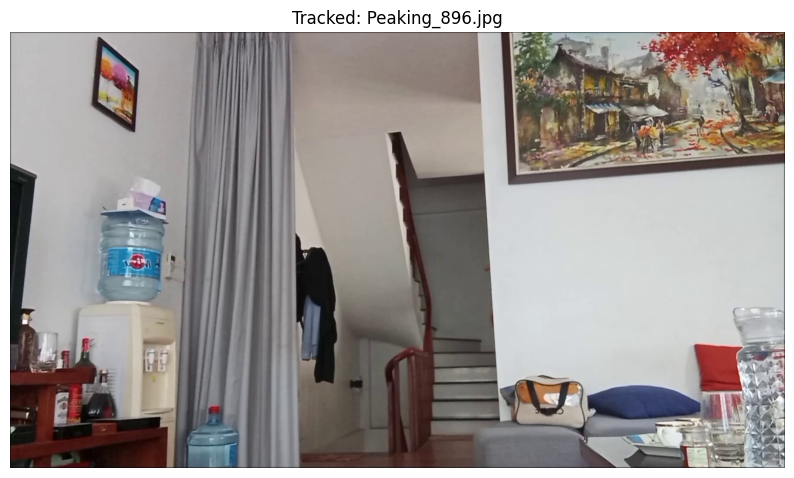


0: 384x640 1 person, 2 benchs, 1 bottle, 1 chair, 2 dining tables, 3 laptops, 1 keyboard, 1 book, 10.9ms
Speed: 2.0ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Normal_284.jpg


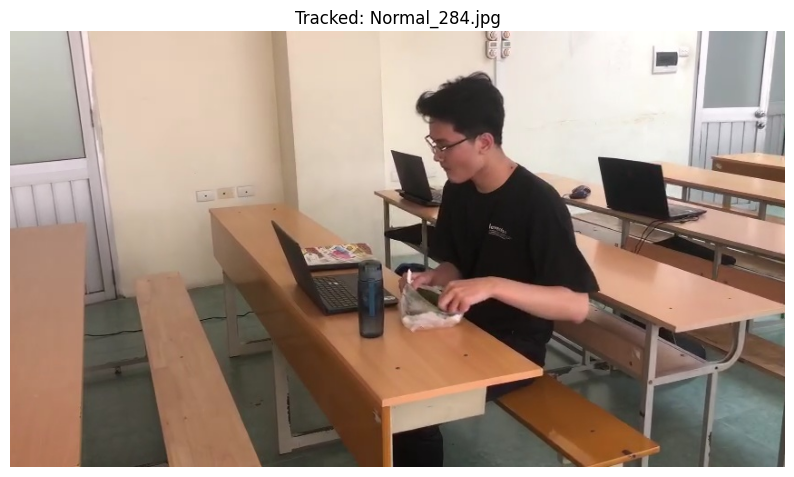


0: 384x640 1 person, 11 chairs, 2 tvs, 10.8ms
Speed: 1.5ms preprocess, 10.8ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Stealing_24.jpg


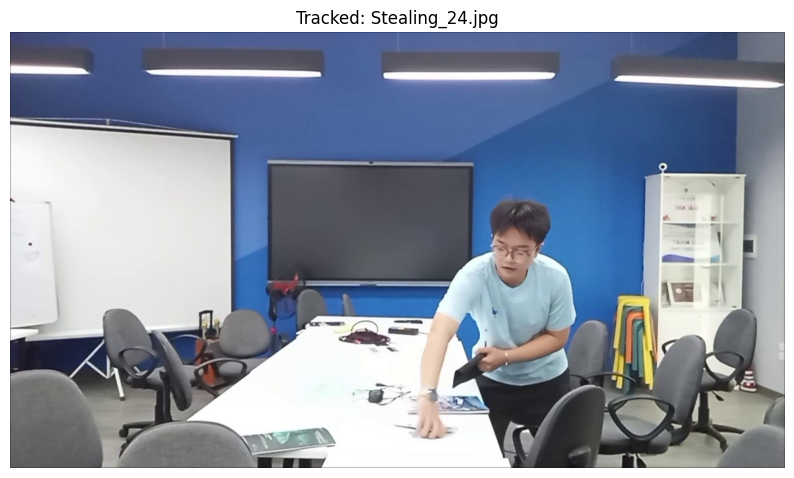


0: 384x640 1 person, 6 chairs, 4 tvs, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Sneaking_183.jpg


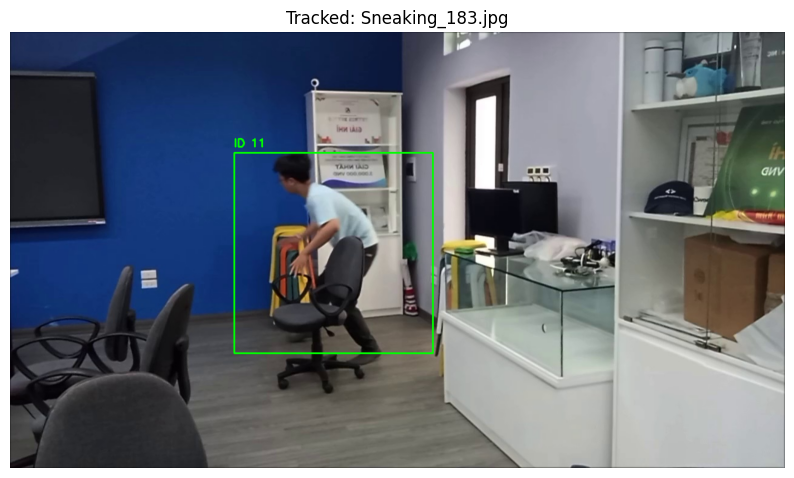


0: 384x640 1 person, 9 chairs, 2 tvs, 1 laptop, 1 book, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Stealing_103.jpg


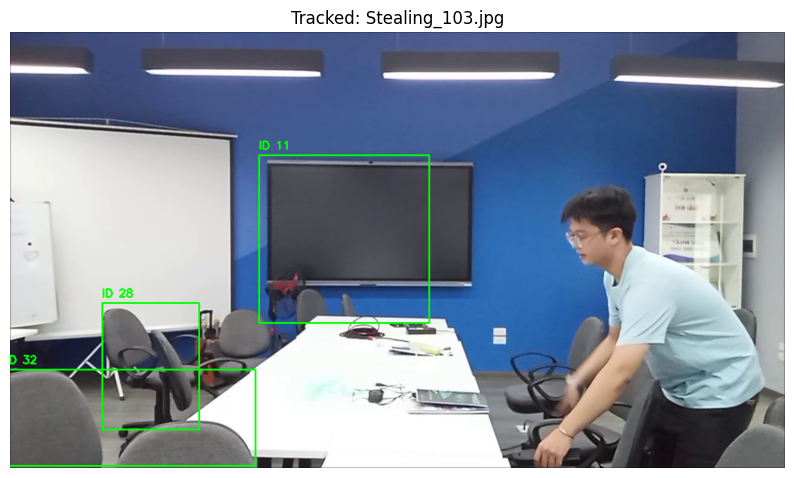


0: 384x640 1 person, 1 cup, 1 chair, 1 tv, 1 book, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Sneaking_627.jpg


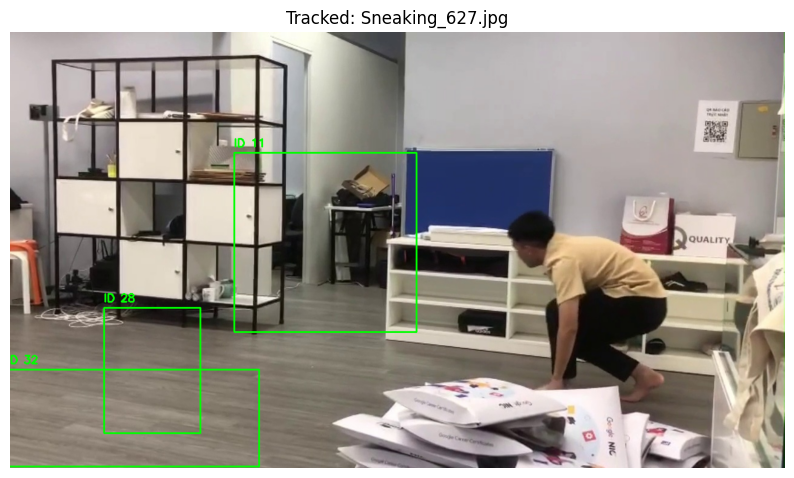


0: 384x640 1 person, 1 bench, 1 chair, 1 dining table, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Stealing_481.jpg


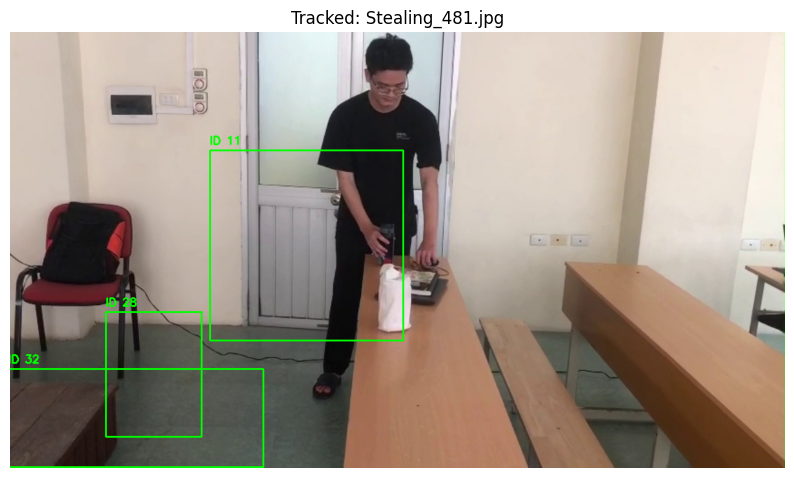


0: 384x640 1 person, 3 benchs, 1 bottle, 5 chairs, 6 dining tables, 1 laptop, 1 book, 11.3ms
Speed: 2.6ms preprocess, 11.3ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
✅ Saved: tracked_Normal_420.jpg


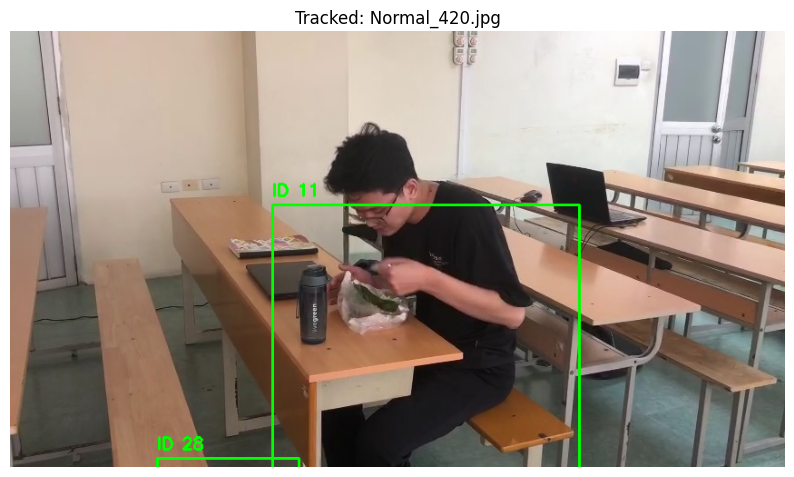

In [71]:
import os
import cv2
import matplotlib.pyplot as plt

# Enable inline plotting (especially for notebooks)
%matplotlib inline  

# Process and visualize
for images_path in selected_images:
    frame = cv2.imread(images_path)
    if frame is None:
        print(f"⚠️ Could not read: {images_path}")
        continue

    tracked_frame, pred_ids, pred_boxes = detect_and_track_image(frame, model, tracker)

    output_path = os.path.join(output_folder, f"tracked_{os.path.basename(images_path)}")
    cv2.imwrite(output_path, tracked_frame)
    print(f"✅ Saved: {os.path.basename(output_path)}")

    # Display result
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(tracked_frame, cv2.COLOR_BGR2RGB))
    plt.title(f"Tracked: {os.path.basename(images_path)}")
    plt.axis("off")
    plt.show()
    













In [67]:
print("Selected images:", selected_images)


Selected images: []


In [6]:
!pip install motmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.5/161.5 kB 4.8 MB/s eta 0:00:00


In [105]:
#for evaluation
import motmetrics as mm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [106]:
tracker = DeepSort(max_age=30, n_init=3, nms_max_overlap=1.0, max_cosine_distance=0.4)

In [107]:
# Detection + Tracking function
def detect_and_track(frame, model, tracker, conf_threshold=0.3):
    results = model(frame)[0]
    detections = []

    for result in results.boxes.data.tolist():
        x1, y1, x2, y2, conf, cls_id = result
        if conf < conf_threshold:
            continue
        bbox = [x1, y1, x2 - x1, y2 - y1]
        detections.append((bbox, conf, model.names[int(cls_id)]))

    tracks = tracker.update_tracks(detections, frame=frame)
    track_data = []

    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x1, y1, x2, y2 = map(int, track.to_ltrb())
        track_data.append((track_id, [x1, y1, x2, y2]))

        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {track_id}', (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    return frame, track_data


0: 352x640 6 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 13.4ms
Speed: 1.8ms preprocess, 13.4ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)


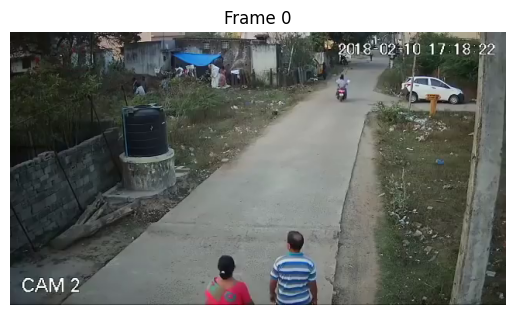


0: 352x640 5 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 persons, 1 car, 2 motorcycles, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 persons, 1 car, 2 motorcycles, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 1 motorcycle, 10.8ms
Speed: 1.5ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 2 motorcycles, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 p

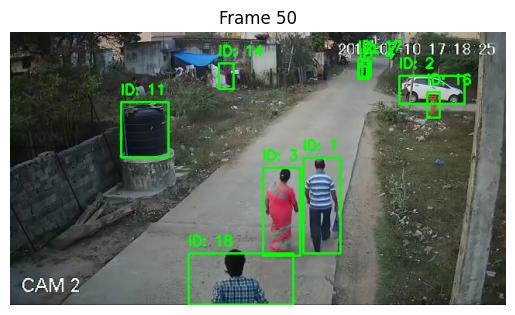


0: 352x640 4 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 handbag, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 motorcycle, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.5ms preprocess, 10.9m

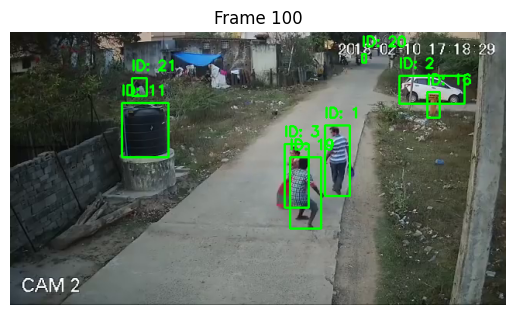


0: 352x640 4 persons, 1 car, 1 fire hydrant, 1 suitcase, 11.7ms
Speed: 1.5ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 4 persons, 1 car, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.5ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.4ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 fire hydrant, 2 handbags, 1 suitcase, 10.8ms
Speed: 1.5ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 car, 1 fire hydrant, 10.9ms
Speed: 1.6ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 3 persons, 1 ca

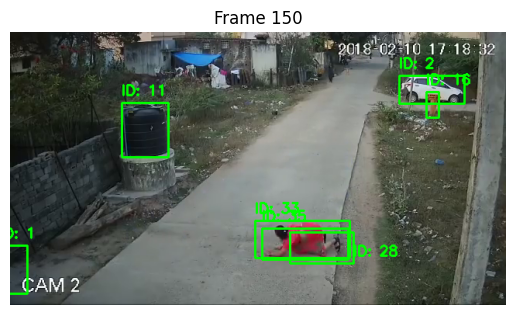


0: 352x640 1 car, 2 fire hydrants, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 car, 2 fire hydrants, 1 suitcase, 10.8ms
Speed: 1.7ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 car, 2 fire hydrants, 1 dog, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.7ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 car, 2 fire hydrants, 1 dog, 11.0ms
Speed: 1.5ms preprocess, 11.0ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 person, 1 car, 2 fire hydrants, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 person, 1 car, 1 fire hydrant, 10.8ms
Speed: 1.3ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 1 person, 1 car, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.7ms preprocess, 10

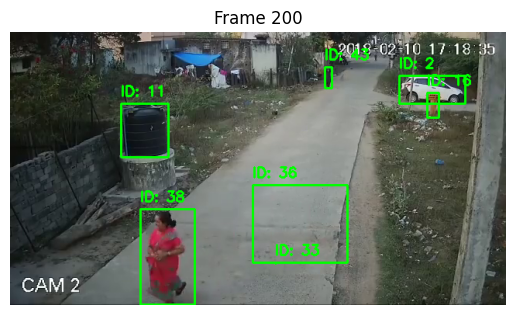


0: 352x640 2 persons, 1 car, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.7ms preprocess, 10.9ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.3ms preprocess, 10.8ms inference, 2.4ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.9ms preprocess, 10.9ms inference, 2.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 2 cars, 1 fire hydrant, 1 suitcase, 10.9ms
Speed: 1.4ms preprocess, 10.9ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 2 persons, 

In [108]:
# Read video file
cap = cv2.VideoCapture("/kaggle/input/cctvfootage/cctv.mp4")

# Video writer setup
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
out = cv2.VideoWriter('output.avi', cv2.VideoWriter_fourcc(*'XVID'), fps, (width, height))

# Track data collection
all_tracks = []

frame_count = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break

    tracked_frame, track_data = detect_and_track(frame, model, tracker)

    # Save video
    if tracked_frame is not None and isinstance(tracked_frame, np.ndarray):
        out.write(tracked_frame)

        # Display every 50th frame
        if frame_count % 50 == 0:
            rgb_frame = cv2.cvtColor(tracked_frame, cv2.COLOR_BGR2RGB)
            plt.imshow(rgb_frame)
            plt.axis('off')
            plt.title(f'Frame {frame_count}')
            plt.show()

        # Collect data
        for track_id, bbox in track_data:
            all_tracks.append({
                'frame': frame_count,
                'track_id': track_id,
                'x1': bbox[0],
                'y1': bbox[1],
                'x2': bbox[2],
                'y2': bbox[3]
            })

    frame_count += 1

cap.release()
out.release()


In [109]:
import pandas as pd
# Save tracking data to CSV
df_tracks = pd.DataFrame(all_tracks)
df_tracks.to_csv('tracking_data.csv', index=False)
print("✅ Video saved as output.avi")
print("✅ Tracking data saved as tracking_data.csv")

✅ Video saved as output.avi
✅ Tracking data saved as tracking_data.csv


In [110]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO
from deep_sort_realtime.deepsort_tracker import DeepSort
import motmetrics as mm

In [111]:
# Load YOLOv8 and DeepSORT
model = YOLO('yolov8s.pt')
tracker = DeepSort(max_age=30)

# Load video
video_path = "/kaggle/input/cctvfootage/cctv.mp4"
cap = cv2.VideoCapture(video_path)

# Output video setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('tracked_output.mp4', fourcc, 20.0, 
                      (int(cap.get(3)), int(cap.get(4))))

# Load ground-truth data
gt_df = pd.read_csv("/kaggle/working/tracking_data.csv")

# MOT Accumulator
acc = mm.MOTAccumulator(auto_id=True)

# Frame tracking
frame_counts = []
frame_id = 1

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Get GT for current frame
    gt_frame = gt_df[gt_df['frame'] == frame_id]
    gt_ids = gt_frame['track_id'].values

    # Convert x1, y1, x2, y2 to x, y, width, height
    x1 = gt_frame['x1'].values
    y1 = gt_frame['y1'].values
    x2 = gt_frame['x2'].values
    y2 = gt_frame['y2'].values
    w = x2 - x1
    h = y2 - y1
    gt_boxes = np.vstack([x1, y1, w, h]).T

    # YOLO detection
    results = model(frame)[0]
    detections = []

    for result in results.boxes.data.tolist():
        x1_det, y1_det, x2_det, y2_det, conf, cls_id = result
        if conf < 0.3:
            continue
        bbox = [x1_det, y1_det, x2_det - x1_det, y2_det - y1_det]
        detections.append((bbox, conf, model.names[int(cls_id)]))

    # DeepSORT tracking
    tracks = tracker.update_tracks(detections, frame=frame)
    predicted_boxes, predicted_ids = [], []

    for track in tracks:
        if not track.is_confirmed():
            continue
        track_id = track.track_id
        x1_tr, y1_tr, x2_tr, y2_tr = map(int, track.to_ltrb())
        w_tr, h_tr = x2_tr - x1_tr, y2_tr - y1_tr
        predicted_boxes.append([x1_tr, y1_tr, w_tr, h_tr])
        predicted_ids.append(track_id)

        # Annotate frame
        cv2.rectangle(frame, (x1_tr, y1_tr), (x2_tr, y2_tr), (0, 255, 0), 2)
        cv2.putText(frame, f'ID: {track_id}', (x1_tr, y1_tr - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Update MOT metrics
    iou_matrix = mm.distances.iou_matrix(gt_boxes, predicted_boxes, max_iou=0.5)
    acc.update(gt_ids, predicted_ids, iou_matrix)

    frame_counts.append(len(predicted_ids))
    out.write(frame)
    frame_id += 1

# Cleanup
cap.release()
out.release()
cv2.destroyAllWindows()
   
       
   


0: 352x640 6 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 11.6ms
Speed: 2.7ms preprocess, 11.6ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 2 motorcycles, 1 fire hydrant, 1 suitcase, 10.8ms
Speed: 1.6ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 persons, 1 car, 2 motorcycles, 1 suitcase, 10.8ms
Speed: 1.4ms preprocess, 10.8ms inference, 2.0ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 6 persons, 1 car, 2 motorcycles, 1 suitcase, 10.8ms
Speed: 1.2ms preprocess, 10.8ms inference, 1.9ms postprocess per image at shape (1, 3, 352, 640)

0: 352x640 5 persons, 1 car, 1 motorcycle, 10.8ms
Speed: 1.3ms preprocess, 10.8ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)

In [ ]:
print(gt_df.columns)


In [112]:
# Evaluation summary
mh = mm.metrics.create()
summary = mh.compute(acc, metrics=['mota', 'idf1'], name='Overall')
print("🎯 Evaluation Summary:\n")
print(summary)

🎯 Evaluation Summary:

            mota     idf1
Overall  0.76244  0.88122


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


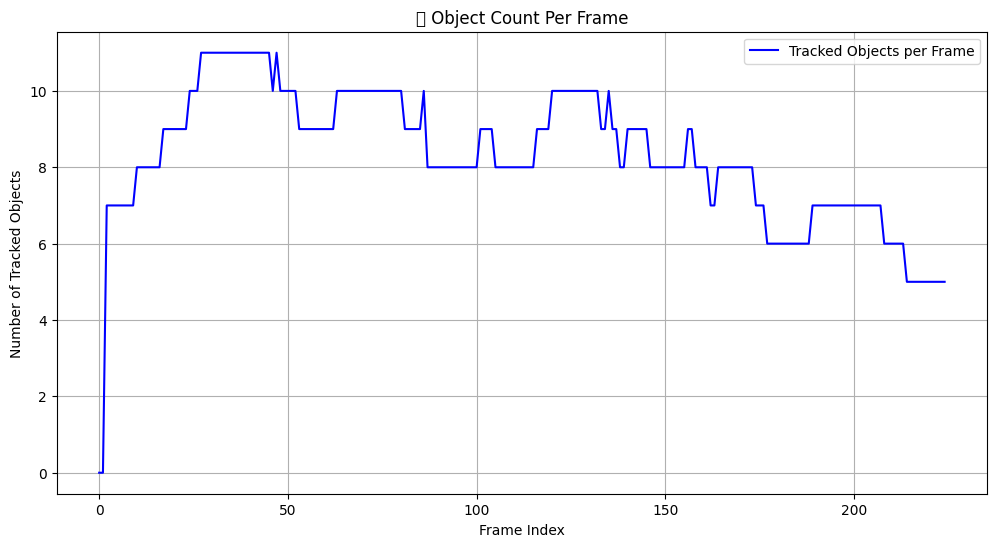

In [113]:
# Plot tracked objects over time
plt.figure(figsize=(12, 6))
plt.plot(frame_counts, label="Tracked Objects per Frame", color='blue')
plt.xlabel("Frame Index")
plt.ylabel("Number of Tracked Objects")
plt.title("📊 Object Count Per Frame")
plt.grid(True)
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


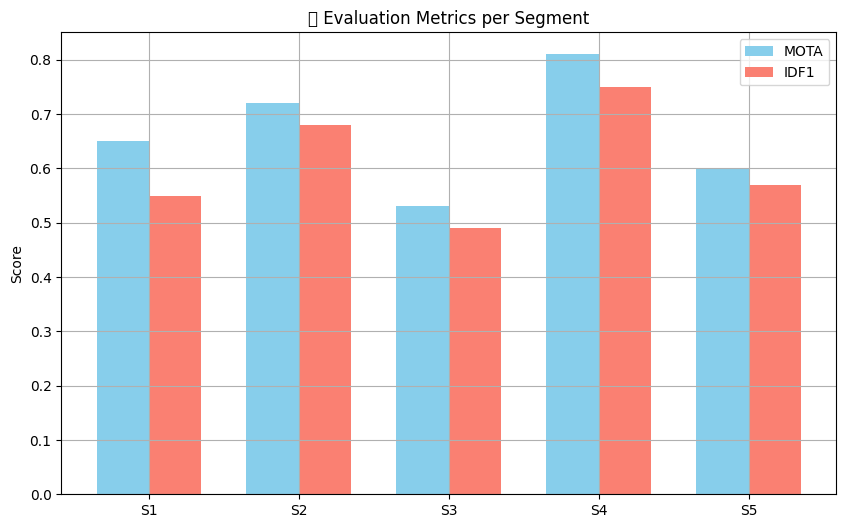

In [114]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulated evaluation results over 5 sample videos or segments
eval_results = {
    "Segment": ["S1", "S2", "S3", "S4", "S5"],
    "MOTA": [0.65, 0.72, 0.53, 0.81, 0.60],
    "IDF1": [0.55, 0.68, 0.49, 0.75, 0.57]
}

df_eval = pd.DataFrame(eval_results)

# 🔹 Plot 1: Bar Chart of MOTA and IDF1
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = range(len(df_eval["Segment"]))

plt.bar(x, df_eval["MOTA"], width=bar_width, label='MOTA', color='skyblue')
plt.bar([p + bar_width for p in x], df_eval["IDF1"], width=bar_width, label='IDF1', color='salmon')

plt.xticks([p + bar_width / 2 for p in x], df_eval["Segment"])
plt.ylabel("Score")
plt.title("📈 Evaluation Metrics per Segment")
plt.legend()
plt.grid(True)
plt.show()
